This is a soccer ball!!


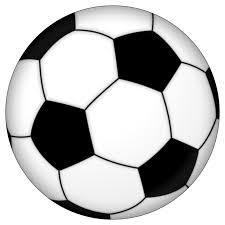

In [19]:
import numpy as np
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

pretrainedMobileNet = tf.keras.applications.MobileNet()

imagePath = "/soccerBall.jpeg"
inputImage = tf.keras.preprocessing.image.load_img("/soccerBall.jpeg", target_size=[224, 224])

inputImage = tf.keras.preprocessing.image.img_to_array(inputImage)
inputImage = tf.keras.applications.mobilenet.preprocess_input(inputImage[tf.newaxis,...])

result = pretrainedMobileNet(inputImage)
decoded = imagenet_labels[np.argsort(result)[0,::-1][:5]+1]

print("This is a " + decoded[0] + "!!")
cv2_imshow(cv2.imread(imagePath))

#Running the model as is

In [23]:
import time

startTime = time.time()

numFrames = 100
for i in range(100):
  #print("Running for iteration #" + str(i))
  result = pretrainedMobileNet(inputImage)

elapsedTime = time.time() - startTime
print("This took {} seconds.".format(elapsedTime))
print("Average latency is {} ms.".format(elapsedTime * 1000./numFrames))
print("Average speed is {} frames / second.".format(numFrames/elapsedTime))

This took 8.189557313919067 seconds.
Average latency is 81.89557313919067 ms.
Average speed is 12.210672221566705 frames / second.


#Freezing the model, then running it

In [28]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

full_model = tf.function(lambda x:pretrainedMobileNet(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(pretrainedMobileNet.inputs[0].shape, pretrainedMobileNet.inputs[0].dtype))

# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

startTime = time.time()

numFrames = 100
for i in range(100):
  #print("Running for iteration #" + str(i))
  result = frozen_func(tf.constant(inputImage))

elapsedTime = time.time() - startTime
print("This took {} seconds.".format(elapsedTime))
print("Average latency is {} ms.".format(elapsedTime * 1000./numFrames))
print("Average speed is {} frames / second.".format(numFrames/elapsedTime))

This took 4.531350374221802 seconds.
Average latency is 45.31350374221802 ms.
Average speed is 22.06847666622417 frames / second.


# Saving the frozen graph and running it using C API

In [29]:
tf.io.write_graph(graph_or_graph_def=frozen_func.graph, logdir=".", name="frozen_graph.pb", as_text=False)

# For how to implement with C API, see ...

'./frozen_graph.pb'